### In this project we are going to try and predict the Max Temperature on a day during the WW2 using the Min Temp on that day

In [1]:
# We import all the libraries, Classes and Functions that will be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Getting the dataframe that will be used

In [3]:
df = pd.read_csv('Summary of Weather.csv')
df.head()

/var/folders/11/3lggbpw928v5mygqz6f696mw0000gn/T/ipykernel_97348/145166560.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

#### Getting the Data that we need


In [21]:
X = df['MinTemp'].values.reshape(-1,1) # the data that is given
y = df['MaxTemp'].values.reshape(-1,1) # the data that we need to predict

#### Splitting the data into training and testing dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 50)

In [23]:
X_train

array([[20.        ],
       [28.88888889],
       [16.66666667],
       ...,
       [23.88888889],
       [18.88888889],
       [24.44444444]])

#### Making the Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

#predicting the outcome for the test set
y_pred = model.predict(X_test)

#### Now ploting

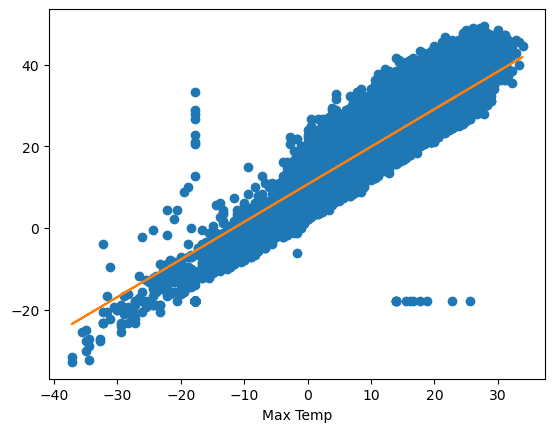

In [30]:
plt.plot(X_test,y_test, 'o')
plt.plot(X_test,y_pred)
plt.xlabel('Min Temp')
plt.xlabel('Max Temp')
plt.show()

#### Calculating the Errors in the model

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [33]:
print(RMSE, MSE, MAE)

4.168171168535003 17.373650890206452 3.173288860240512


### Conclusion

Given the provided data the Max temp on the day can be calculated accompanied by following amount of errors